#  Recommendation System for Netflix Prize Dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# To load the 'combined_data_1' dataset after uploading it to Jupyter notebook

In [2]:
# Reading dataset file
dataset = pd.read_csv(r'combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
dataset.head()

Cust_Id  Rating
0       1:     NaN
1  1488844     3.0
2   822109     5.0
3   885013     4.0
4    30878     4.0

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [3]:
# Convert Ratings column to a float
print(dataset.info())
dataset['Rating'] = dataset['Rating'].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB
None


In [4]:
#To print the datatype of columns
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [4]:
#To inspect the shape of the dataset
dataset.shape

(24058263, 2)

In [7]:
#To print the head of dataset
dataset.head()

Cust_Id  Rating
0       1:     NaN
1  1488844     3.0
2   822109     5.0
3   885013     4.0
4    30878     4.0

In [8]:
#To find the distribution of different ratings in the dataset
p = dataset.groupby('Rating')['Rating'].count()
p

Rating
1.0    1118186
2.0    2439073
3.0    6904181
4.0    8085741
5.0    5506583
Name: Rating, dtype: int64

In [9]:
dataset['Rating'].value_counts()

4.0    8085741
3.0    6904181
5.0    5506583
2.0    2439073
1.0    1118186
Name: Rating, dtype: int64

In [10]:
p=pd.DataFrame(p)
p

Rating
Rating         
1.0     1118186
2.0     2439073
3.0     6904181
4.0     8085741
5.0     5506583

In [10]:
#p=p.rename(columns = {'Rating':'Count'})

In [11]:
p.rename(columns = {'Rating':'Count'}, inplace = True)

In [12]:
p

Count
Rating         
1.0     1118186
2.0     2439073
3.0     6904181
4.0     8085741
5.0     5506583

In [13]:
#p.reset_index(inplace=True)

In [13]:
p.sort_values(by='Count', ascending=False)

Count
Rating         
4.0     8085741
3.0     6904181
5.0     5506583
2.0     2439073
1.0     1118186

In [14]:
dataset.shape

(24058263, 2)

In [15]:
dataset.isna()

Cust_Id  Rating
0           False    True
1           False   False
2           False   False
3           False   False
4           False   False
...           ...     ...
24058258    False   False
24058259    False   False
24058260    False   False
24058261    False   False
24058262    False   False

[24058263 rows x 2 columns]

In [16]:
dataset.isna().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [17]:
dataset.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [19]:
#dir(pd)

In [20]:
#dir(np)

In [21]:
# get movie count by counting nan values
movie_count = dataset.isnull().sum()[1]#1 in the square brackets is the index of the count of null values in the ratings column
movie_count

4499

In [22]:
dataset['Cust_Id'].nunique()#will display number of unique values in the column

475257

In [23]:
dataset['Cust_Id'].unique()# will display unique values of the column

array(['1:', '1488844', '822109', ..., '72311', '4499:', '594210'],
      dtype=object)

In [24]:
#dataset['Cust_Id'].value_counts()

In [25]:
# get customer count
cust_count = dataset['Cust_Id'].nunique()-movie_count
cust_count

470758

In [26]:
# get rating count

rating_count = dataset['Cust_Id'].count() - movie_count

rating_count

24053764

In [27]:
p

Count
Rating         
1.0     1118186
2.0     2439073
3.0     6904181
4.0     8085741
5.0     5506583

In [28]:
p.reset_index(inplace=True)# reset_index() will reset the index, the previous index will reset 
#as a column and in place of the index, we will be having 0,1,2....
#inplace=True--- will be updating the values in the same variable

In [29]:
p

Rating    Count
0     1.0  1118186
1     2.0  2439073
2     3.0  6904181
3     4.0  8085741
4     5.0  5506583

## To plot the distribution of the ratings in as a bar plot

Text(0.5, 1.0, 'Total pool: 4499 Movies, 470758 customers, 24053764 ratings given')

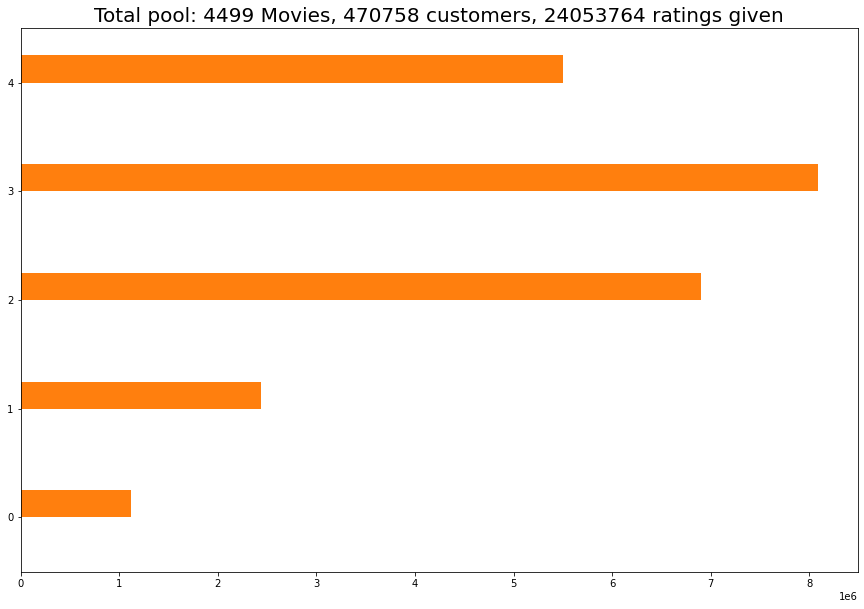

In [30]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
#plt.axis('off')


#print--->print data  '' 'Total pool'  

In [31]:
y=p['Count']
y

0    1118186
1    2439073
2    6904181
3    8085741
4    5506583
Name: Count, dtype: int64

In [32]:
dataset.head()

Cust_Id  Rating
0       1:     NaN
1  1488844     3.0
2   822109     5.0
3   885013     4.0
4    30878     4.0

In [33]:
#cust_id    rating    movie_id
#1488844	3.0     1
#2	822109	5.0     1
#3	885013	4.0     1
#4	30878	4.0     1

#638248  4       2

# To create a numpy array containing movie ids corresponding to the rows in the 'ratings' dataset

In [34]:
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan = pd.DataFrame(pd.isnull(dataset.Rating) )
df_nan.head()

Rating
0    True
1   False
2   False
3   False
4   False

In [35]:
# To store the index of all the rows containing 'nan' values
df_nan = df_nan[df_nan['Rating'] == True]
df_nan.shape

(4499, 1)

In [36]:
df_nan

Rating
0           True
548         True
694         True
2707        True
2850        True
...          ...
24046714    True
24047329    True
24056849    True
24057564    True
24057834    True

[4499 rows x 1 columns]

In [37]:
# To reset the index of the dataframe
df_nan=df_nan.reset_index()
df_nan.head()

index  Rating
0      0    True
1    548    True
2    694    True
3   2707    True
4   2850    True

In [38]:
#cust_id    rating    movie_id
#1488844	3.0     1
#2	822109	5.0     1
#3	885013	4.0     1
#4	30878	4.0     1

#638248  4       2

In [39]:
df_nan.head(5)

index  Rating
0      0    True
1    548    True
2    694    True
3   2707    True
4   2850    True

In [40]:
df_nan.shape# 0-4498 #

(4499, 2)

In [41]:
df_nan['index']

0              0
1            548
2            694
3           2707
4           2850
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4499, dtype: int64

In [42]:
df_nan['index'][:-1]#will extract all the records from the index column except for the last index-- 4498

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [43]:
df_nan['index'][1:]#this sytax will extract records from the index column from the 1st index

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [44]:
np.full((2,4), 'python')

array([['python', 'python', 'python', 'python'],
       ['python', 'python', 'python', 'python']], dtype='<U6')

In [45]:
dataset.head()

Cust_Id  Rating
0       1:     NaN
1  1488844     3.0
2   822109     5.0
3   885013     4.0
4    30878     4.0

In [46]:
dataset.shape

(24058263, 2)

In [47]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [48]:
print('monvie numpy:', movie_np)

monvie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]


In [49]:
l=[3,4,5,3,2]

In [50]:
l[-1]

2

In [51]:
len(l)

5

In [52]:
len(dataset)

24058263

In [53]:
df_nan.iloc[-1, 0]

24057834

In [54]:
np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),4499)

array([[4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 

In [55]:
df_nan.head()

index  Rating
0      0    True
1    548    True
2    694    True
3   2707    True
4   2850    True

In [56]:
694-548-1

145

In [57]:
#for the 1st loop, i=548, j=0
#np.full((1,i-j-1), movie_id)-- np.full((1,547),1)

#for the 2nd loop, i=694, j=548
#np.full((1,145),2)

In [58]:
np.full((1,145),2)

array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])

In [59]:
r=zip(df_nan['index'][1:],df_nan['index'][:-1])

In [60]:
r

In [61]:
tuple(r)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [62]:
len(dataset)

24058263

In [63]:
df_nan.iloc[-1, 0] - 1

24057833

In [64]:
movie_id = 1
np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [65]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [66]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [67]:
x =zip(df_nan['index'][1:],df_nan['index'][:-1])
x

In [68]:
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [69]:
694-548-1

145

In [70]:
1,(i-j-1)
1, (694-548-1)
1,145

(1, 145)

In [71]:
temp = np.full((1,145),2 )

In [72]:
print(temp)

[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2]]


In [73]:
dataset.head()

Cust_Id  Rating
0       1:     NaN
1  1488844     3.0
2   822109     5.0
3   885013     4.0
4    30878     4.0

In [74]:
dataset[pd.notnull(dataset['Rating'])]

Cust_Id  Rating
1         1488844     3.0
2          822109     5.0
3          885013     4.0
4           30878     4.0
5          823519     3.0
...           ...     ...
24058258  2591364     2.0
24058259  1791000     2.0
24058260   512536     5.0
24058261   988963     3.0
24058262  1704416     3.0

[24053764 rows x 2 columns]

In [75]:
#To append the above created array to the datset after removing the 'nan' rows
dataset = dataset[pd.notnull(dataset['Rating'])]

dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

-Dataset examples-


Cust_Id  Rating  Movie_Id
1  1488844     3.0         1
2   822109     5.0         1
3   885013     4.0         1
4    30878     4.0         1
5   823519     3.0         1

In [76]:
dataset.head(20)

Cust_Id  Rating  Movie_Id
1   1488844     3.0         1
2    822109     5.0         1
3    885013     4.0         1
4     30878     4.0         1
5    823519     3.0         1
6    893988     3.0         1
7    124105     4.0         1
8   1248029     3.0         1
9   1842128     4.0         1
10  2238063     3.0         1
11  1503895     4.0         1
12  2207774     5.0         1
13  2590061     3.0         1
14     2442     3.0         1
15   543865     4.0         1
16  1209119     4.0         1
17   804919     4.0         1
18  1086807     3.0         1
19  1711859     4.0         1
20   372233     5.0         1

In [77]:
dataset.shape

(24053764, 3)

# Data Cleaning

In [78]:
f = ['count','mean']

In [79]:
dataset.groupby('Movie_Id').agg(f)

Cust_Id               Rating          
           count          mean  count      mean
Movie_Id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298
...          ...           ...    ...       ...
4495         614  1.321093e+06    614  3.478827
4496        9519  1.332006e+06   9519  3.763000
4497         714  1.330543e+06    714  2.715686
4498         269  1.262035e+06    269  2.464684
4499         428  1.270551e+06    428  2.614486

[4499 rows x 4 columns]

In [80]:
f

['count', 'mean']

In [81]:
dataset.groupby('Movie_Id')['Rating'].agg(f)

count      mean
Movie_Id                 
1           547  3.749543
2           145  3.558621
3          2012  3.641153
4           142  2.739437
5          1140  3.919298
...         ...       ...
4495        614  3.478827
4496       9519  3.763000
4497        714  2.715686
4498        269  2.464684
4499        428  2.614486

[4499 rows x 2 columns]

In [82]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.75),2)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] <= movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 2538.0


In [83]:
2538.0

2538.0

In [84]:
#calculate the thershold value of each customer,
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f)#f= count(), mean()
dataset_cust_summary.index = dataset_cust_summary.index.map(int)
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.75),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index

print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 64.0


In [85]:
print(f'Original Shape: {dataset.shape}')


Original Shape: (24053764, 3)


In [86]:
drop_movie_list

Int64Index([   1,    2,    3,    4,    5,    6,    7,    9,   10,   11,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3374)

In [87]:
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
            2649409, 2649421, 2649429],
           dtype='int64', name='Cust_Id', length=351840)

In [88]:
dataset.head()

Cust_Id  Rating  Movie_Id
1  1488844     3.0         1
2   822109     5.0         1
3   885013     4.0         1
4    30878     4.0         1
5   823519     3.0         1

In [89]:
#isna(), isin()

In [90]:
print('The value of a is:', 34)

The value of a is: 34


In [91]:
print('The value of a is {}'.format(60))

The value of a is 60


In [92]:
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]#~ symbol will not include the true values coming from the isin()
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (15622656, 3)


In [93]:
print('-Data Examples-')
dataset.head()

-Data Examples-


Cust_Id  Rating  Movie_Id
5106   824097     2.0         8
5109   785314     1.0         8
5110   243963     3.0         8
5112  1447783     4.0         8
5116  1912665     1.0         8

# Create ratings matrix for 'ratings' matrix with Rows = userId, Columns = movieId

In [94]:
#sparce matrix-- 

In [95]:
df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')
print(df_p.shape)

(118918, 1125)


In [96]:
df_p.head()

Movie_Id  8     16    17    18    26    28    30    33    44    45    ...  \
Cust_Id                                                               ...   
6          NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN   NaN   NaN  ...   
7          5.0   NaN   NaN   NaN   NaN   4.0   5.0   NaN   NaN   NaN  ...   
79         NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN   NaN   NaN  ...   
97         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
134        NaN   NaN   NaN   NaN   NaN   5.0   NaN   NaN   NaN   NaN  ...   

Movie_Id  4472  4474  4478  4479  4485  4488  4490  4492  4493  4496  
Cust_Id                                                               
6          3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
7          3.0   NaN   NaN   5.0   NaN   NaN   NaN   NaN   NaN   NaN  
79         4.0   NaN   NaN   NaN   NaN   NaN   4.0   NaN   NaN   NaN  
97         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
134        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 1125 columns]

### To load the movie_titles dataset

In [97]:
#df_title['Year']=df_title['Year'].astype('int')

In [98]:
#utf-8' codec can't decode byte 0xe9 in position 207672: invalid continuation byte
#encoding="ISO-8859-1"
#

In [100]:
import pandas as pd
df_title = pd.read_csv("movie_titles.csv",encoding="ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])

df_title.set_index('Movie_Id', inplace = True)

print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


In [101]:
#df_title=df_title.loc[:,['Year','Name']]

# To install the scikit-surprise library for implementing SVD

### Run the following command in the Anaconda Prompt to install surprise package

In [ ]:
#Singular value decomposition (SVD) is a matrix factorization method that generalizes the eigendecomposition of a 
#square matrix (n x n) to any matrix (n x m)
#The SVD can be calculated by calling the svd() function

In [108]:
#!pip install scikit-surprise-- works in colab

In [103]:
#conda install -c conda-forge scikit-surprise-- anaconda prompt
#conda update -n base -c defaults conda-- update your conda in anaconda prompt
#!pip install scikit-surprise config --global http.sslVerify false -- for jupyter users--  


In [119]:
!pip install scikit-surprise config

In [104]:
#overfiting means-- 
#train the model on train dataset
#test
#acc on top of test dataset== 70%
#acc on top of train dataset== 100%

In [117]:
#!pip install scikit-surprise

In [118]:
#conda install -c conda-forge scikit-surprise

In [120]:
# Import required libraries
import math
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate#k-fold 

In [ ]:
#MAE -- mean alsolute error
#modulus() of(prediction-actual)

#0.56
#1.7


In [121]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9917  1.0000  0.9851  0.9922  0.0061  
MAE (testset)     0.8027  0.8143  0.7980  0.8050  0.0069  
Fit time          7.11    7.78    6.09    6.99    0.69    
Test time         0.43    0.40    0.23    0.36    0.09    


{'test_rmse': array([0.99172015, 0.99995759, 0.98506509]),
 'test_mae': array([0.80265523, 0.8142827 , 0.79795612]),
 'fit_time': (7.110986232757568, 7.780197620391846, 6.092704772949219),
 'test_time': (0.4338400363922119, 0.3969385623931885, 0.23440814018249512)}

In [122]:
data

In [123]:
dataset.head()

Cust_Id  Rating  Movie_Id
5106   824097     2.0         8
5109   785314     1.0         8
5110   243963     3.0         8
5112  1447783     4.0         8
5116  1912665     1.0         8

In [124]:
df_title

Year                                               Name
Movie_Id                                                           
1         2003.0                                    Dinosaur Planet
2         2004.0                         Isle of Man TT 2004 Review
3         1997.0                                          Character
4         1994.0                       Paula Abdul's Get Up & Dance
5         2004.0                           The Rise and Fall of ECW
...          ...                                                ...
17766     2002.0  Where the Wild Things Are and Other Maurice Se...
17767     2004.0                  Fidel Castro: American Experience
17768     2000.0                                              Epoch
17769     2003.0                                        The Company
17770     2003.0                                       Alien Hunter

[17770 rows x 2 columns]

In [ ]:
'''
  movie id  Cust_Id	Rating Name
    90	824097	5- movie_name1
    8	785314	5- movie_name 2
    56	243963	5
    100	1447783	5
    290	1912665	5
'''

## To find all the movies rated as 5 stars by user with userId = 712664

In [125]:
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

Movie_Id
79                           The Killing
175                       Reservoir Dogs
199                      The Deer Hunter
241                   North by Northwest
256    Ghost Dog: The Way of the Samurai
348        The Last Temptation of Christ
357                House of Sand and Fog
416                             Elephant
442                  Mississippi Burning
457                    Kill Bill: Vol. 2
Name: Name, dtype: object

In [126]:
user_712664=df_title

In [127]:
df_title

Year                                               Name
Movie_Id                                                           
1         2003.0                                    Dinosaur Planet
2         2004.0                         Isle of Man TT 2004 Review
3         1997.0                                          Character
4         1994.0                       Paula Abdul's Get Up & Dance
5         2004.0                           The Rise and Fall of ECW
...          ...                                                ...
17766     2002.0  Where the Wild Things Are and Other Maurice Se...
17767     2004.0                  Fidel Castro: American Experience
17768     2000.0                                              Epoch
17769     2003.0                                        The Company
17770     2003.0                                       Alien Hunter

[17770 rows x 2 columns]

# Train an SVD to predict ratings for user with userId = 1

In [129]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often 
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
#user_712664-- is only containg the names of the movies

# getting full dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

        Year                                        Name  Estimate_Score
1847  1956.0    Samurai Trilogy 3: Duel at Ganryu Island             5.0
4352  2002.0              Curb Your Enthusiasm: Season 3             5.0
3443  2004.0       Family Guy: Freakin' Sweet Collection             5.0
1031  1992.0                                 Hard Boiled             5.0
2194  2004.0  The Looney Tunes Golden Collection: Vol. 2             5.0
995   1961.0                                     Yojimbo             5.0
2318  2003.0  The Looney Tunes Golden Collection: Vol. 1             5.0
3289  1974.0                               The Godfather             5.0
888   2004.0                          Reno 911: Season 2             5.0
2943  1994.0                                 Hoop Dreams             5.0
